In [21]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

from dumb_bots.honestbot import HonestBot
from dumb_bots.randombot import RandomBot
from PokerBotSimple import PokerBotSimple
from PokerBot2 import PokerBot2

from pypokerengine.api.game import setup_config, start_poker

In [35]:

def update_bar_chart(winnings, labels, game_num):
    plt.figure(figsize=(8, 8))
    plt.bar(labels, winnings, color='skyblue')

    # Add labels and title
    plt.xlabel('Winnings')
    plt.ylabel('Values')
    plt.title('Winnings After Game: ' + str(game_num))
    plt.show()

In [32]:
saved_model_to_test = "./models/Daniel_Negreanu"
new_model_to_test = "./models/Phil_Ivey"
INITIAL_STACK = 50

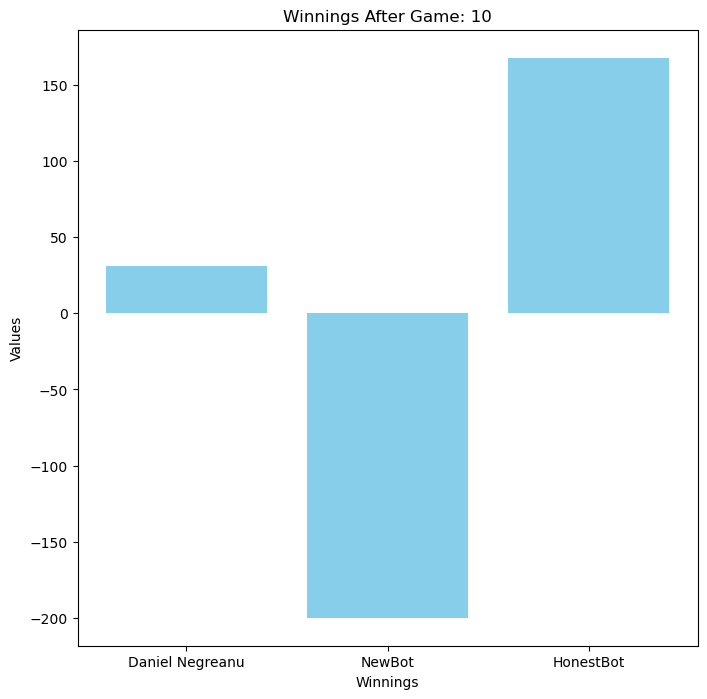

In [37]:
player1 = PokerBotSimple(saved_model=saved_model_to_test, training_mode_on=False)
player2 = PokerBot2(saved_model=new_model_to_test, training_mode_on=False)
player3 = HonestBot()


dan_wins = 0
random_wins = 0
honest_wins = 0
labels = ['Daniel Negreanu', 'NewBot', 'HonestBot']
winnings = [0, 0, 0]
for i in range(1, 11):
    config = setup_config(max_round=100, initial_stack=INITIAL_STACK, small_blind_amount=1)
    config.register_player(name="Daniel Negreanu", algorithm=player1)
    config.register_player(name="NewBot", algorithm=player2)
    config.register_player(name="HonestBot", algorithm=player3)
    game_result = start_poker(config, verbose=0)
    for player_info in game_result["players"]:
        if player_info['name'] == "Daniel Negreanu":
            winnings[0] += (player_info['stack'] - INITIAL_STACK)
        if player_info['name'] == "HonestBot":
            winnings[2] += (player_info['stack'] - INITIAL_STACK)
        if player_info['name'] == "NewBot":
            winnings[1] += (player_info['stack'] - INITIAL_STACK)
    update_bar_chart(winnings, labels, i)
    time.sleep(0.5)
    clear_output(wait=True)